# Jupyter notebook: Affine equivalences of rational surfaces of translation, and applications to rational minimal surfaces

This is a Jupyter notebook accompanying the paper [1].

[1] J.G. Alcazar, G. Muntingh. _Affine equivalences of rational surfaces of translation, and applications to rational minimal surfaces_, Available at arXiv.

In [2]:
# !pip install sympy numpy matplotlib tabulate

import numpy as np
import sympy as sp
from utils.minsurf import Weierstrass_Enneper
from sympy.assumptions import assuming, Q
# sp.init_printing(use_unicode=True)
sp.init_printing()

from IPython.display import display, Math, Latex, HTML
from tabulate import tabulate

In [4]:
def T1(n, x=None):
    """
    :param n: Degree of the Chebyshev polynomial
    :param x: Variable/number
    :return: Chebyshev polynomial of the first kind of degree n in the variable/number x.
    """
    if x is None:
        x = sp.Symbol('x')

    if n == 0:
        return 1
    elif n == 1:
        return x
    elif n >= 2:
        return sp.expand(2*x*T1(n-1, x=x) - T1(n-2, x=x))


def S_enneper(k):
    r, s, t = sp.symbols("r s t")

    x = sp.expand(sp.expand(t - r**(2*k+1) * T1(2*k + 1, x=t/r)/(2*k + 1)).subs(r, sp.sqrt(s**2 + t**2)))
    y = sp.expand(sp.expand(-s - (-1)**k * r**(2*k+1) * T1(2*k + 1, x=s/r)/(2*k + 1)).subs(r, sp.sqrt(s**2 + t**2)))
    z = sp.expand(sp.expand(2*r**(k+1) * T1(k+1, x=t/r)/(k+1)).subs(r, sp.sqrt(s**2 + t**2)))

    return x, y, z


def binomial(n, k):
    assert(0 <= k <= n)

    if n == 0 or n == 1 or k == 0 or k == n:
        return 1
    else:
        return binomial(n-1, k-1) + binomial(n-1, k)

r, s, t = sp.symbols("r s t", real=True)
z = sp.Symbol('z', nonzero=True)
k = sp.Symbol('k', positive=True)
m = sp.Symbol('m', positive=True)

## Proposition 7 in [1]

The Weierstrass form with f=2 and g=z**k yields the minimal curve


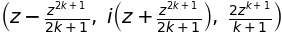

In [5]:
f = 2
g = z**k
psi = Weierstrass_Enneper(f, g, z, imag_unit=sp.I)
print(f"The Weierstrass form with f={f} and g={g} yields the minimal curve")
display(psi)

## Proposition 8 in [1] (for the case k=1)

In [12]:
Psi = [[sp.expand(expr.subs(k, 1).diff(z, k0).subs(z, 0)) for expr in psi] for k0 in [1, 2, 3]]
Psi = sp.Matrix(Psi).transpose()
A = sp.Matrix([[sp.I**m, 0, 0], [0, (-1)**m, 0], [0, 0, (-sp.I)**m]])
M = Psi*A*Psi.inv()
print("\nThe matrix Psi=")
display(Psi)
print("\nThe matrix Psi^-1=")
display(Psi.inv())
print("\nThe matrix A=")
display(A)
print("\nThe matrix M=")
display(M)
R1 = M.subs(m, 1)
print("\nThe matrix R1=")
display(R1)



The matrix Psi=


⎡1  0  -2 ⎤
⎢         ⎥
⎢ⅈ  0  2⋅ⅈ⎥
⎢         ⎥
⎣0  2   0 ⎦


The matrix Psi^-1=


⎡      -ⅈ      ⎤
⎢1/2   ───   0 ⎥
⎢       2      ⎥
⎢              ⎥
⎢ 0     0   1/2⎥
⎢              ⎥
⎢      -ⅈ      ⎥
⎢-1/4  ───   0 ⎥
⎣       4      ⎦


The matrix A=


⎡ m              ⎤
⎢ⅈ     0      0  ⎥
⎢                ⎥
⎢        m       ⎥
⎢0   (-1)     0  ⎥
⎢                ⎥
⎢               m⎥
⎣0     0    (-ⅈ) ⎦


The matrix M=


⎡   m       m         m         m       ⎤
⎢  ⅈ    (-ⅈ)       ⅈ⋅ⅈ    ⅈ⋅(-ⅈ)        ⎥
⎢  ── + ─────    - ──── + ───────    0  ⎥
⎢  2      2         2        2          ⎥
⎢                                       ⎥
⎢   m         m      m       m          ⎥
⎢ⅈ⋅ⅈ    ⅈ⋅(-ⅈ)      ⅈ    (-ⅈ)           ⎥
⎢──── - ───────     ── + ─────       0  ⎥
⎢ 2        2        2      2            ⎥
⎢                                       ⎥
⎢                                      m⎥
⎣      0                0          (-1) ⎦


The matrix R1=


⎡0   1  0 ⎤
⎢         ⎥
⎢-1  0  0 ⎥
⎢         ⎥
⎣0   0  -1⎦

## Example 1 in [1]

In [7]:
for k in range(1, 4+1):
    print(f"\nThe Enneper surface of order k={k} has parametrization:")
    display(S_enneper(k))


The Enneper surface of order k=1 has parametrization:



The Enneper surface of order k=2 has parametrization:



The Enneper surface of order k=3 has parametrization:



The Enneper surface of order k=4 has parametrization:


## Remark 2 in [1]

In [19]:
for n in range(0, 5):
    k, eps = divmod(n, 2)
    lhs1 = sp.expand(sp.expand(r**n * T(n, t/r)).subs(r, sp.sqrt(s**2 + t**2)))
    lhs2 = sp.expand(sp.expand(r**n * T(n, s/r)).subs(r, sp.sqrt(s**2 + t**2)))
    rhs1 = sum([(-1)**(k+m) * binomial(n, 2*m + eps) * s**(n - 2*m - eps) * t**(2*m + eps) for m in range(k+1)])
    rhs2 = sum([(-1)**(k+m) * binomial(n, 2*m + eps) * t**(n - 2*m - eps) * s**(2*m + eps) for m in range(k+1)])
    print(f"For n={n}, the lhs and rhs in Remark 2 match: {lhs1 == rhs1 and lhs2 == rhs2}")

For n=0, the lhs and rhs in Remark 2 match: True
For n=1, the lhs and rhs in Remark 2 match: True
For n=2, the lhs and rhs in Remark 2 match: True
For n=3, the lhs and rhs in Remark 2 match: True
For n=4, the lhs and rhs in Remark 2 match: True


## Table 1 in [1]
Consider the unitary matrices
$$\mathbf{B} = \begin{bmatrix}0&-i&0\\i&0&0\\0&0&i \end{bmatrix},\quad 
\mathbf{C} = \begin{bmatrix}i&0&0\\0&i&0\\0&0&i \end{bmatrix},\quad
\mathbf{S} = \begin{bmatrix}1&0&0\\0&-1&0\\0&0&1\end{bmatrix},\quad
\mathbf{T} = \begin{bmatrix}1&0&0\\0&1&0\\0&0&-1\end{bmatrix},\quad
\mathbf{R}_1 = \begin{bmatrix}0&1&0\\-1&0&0\\0&0&-1 \end{bmatrix}.$$
The matrices in Table 1 are $\mathbf{S}^n \mathbf{B}^s \mathbf{C}^{q+r}$, for $q,r,s \in \mathbb{Z}/4\mathbb{Z}$ and $n\in \mathbb{Z}/2\mathbb{Z}$.

In [7]:
def matrix_to_latex(M):
    s = "$\\begin{bmatrix}" + \
        "".join(["".join([str(M[i])] + (i % 3 != 2)*["&"] + (i % 3 == 2)*["\\\\"])  for i in range(len(C))]) + \
        "\end{bmatrix}$"
    return s

S = sp.Matrix([[1, 0, 0], [0, -1, 0], [0, 0, 1]])
B = sp.Matrix([[0, -sp.I, 0], [sp.I, 0, 0], [0, 0, sp.I]])
C = sp.Matrix([[sp.I, 0, 0], [0, sp.I, 0], [0, 0, sp.I]])
T = sp.Matrix([[1, 0, 0], [0, 1, 0], [0, 0, -1]])
I = S**0

In [8]:
headers = ['$M^+_{q+r,s}$', '$q+r\equiv 0$', '$q+r\equiv 1$', '$q+r \equiv 2$', '$q+r \equiv 3$']
table = [ [f"$s\equiv{s}$"] + [matrix_to_latex(B**s * C**qr) for qr in range(4)] for s in range(4)]
HTML(tabulate(table, headers=headers, floatfmt='.3e', tablefmt='html'))

"$M^+_{q+r,s}$",$q+r\equiv 0$,$q+r\equiv 1$,$q+r \equiv 2$,$q+r \equiv 3$
$s\equiv0$,$\begin{bmatrix}1&0&0\\0&1&0\\0&0&1\\\end{bmatrix}$,$\begin{bmatrix}I&0&0\\0&I&0\\0&0&I\\\end{bmatrix}$,$\begin{bmatrix}-1&0&0\\0&-1&0\\0&0&-1\\\end{bmatrix}$,$\begin{bmatrix}-I&0&0\\0&-I&0\\0&0&-I\\\end{bmatrix}$
$s\equiv1$,$\begin{bmatrix}0&-I&0\\I&0&0\\0&0&I\\\end{bmatrix}$,$\begin{bmatrix}0&1&0\\-1&0&0\\0&0&-1\\\end{bmatrix}$,$\begin{bmatrix}0&I&0\\-I&0&0\\0&0&-I\\\end{bmatrix}$,$\begin{bmatrix}0&-1&0\\1&0&0\\0&0&1\\\end{bmatrix}$
$s\equiv2$,$\begin{bmatrix}1&0&0\\0&1&0\\0&0&-1\\\end{bmatrix}$,$\begin{bmatrix}I&0&0\\0&I&0\\0&0&-I\\\end{bmatrix}$,$\begin{bmatrix}-1&0&0\\0&-1&0\\0&0&1\\\end{bmatrix}$,$\begin{bmatrix}-I&0&0\\0&-I&0\\0&0&I\\\end{bmatrix}$
$s\equiv3$,$\begin{bmatrix}0&-I&0\\I&0&0\\0&0&-I\\\end{bmatrix}$,$\begin{bmatrix}0&1&0\\-1&0&0\\0&0&1\\\end{bmatrix}$,$\begin{bmatrix}0&I&0\\-I&0&0\\0&0&I\\\end{bmatrix}$,$\begin{bmatrix}0&-1&0\\1&0&0\\0&0&-1\\\end{bmatrix}$


In [9]:
headers = ['$M^-_{q+r,s}$', '$q+r\equiv 0$', '$q+r\equiv 1$', '$q+r \equiv 2$', '$q+r \equiv 3$']
table = [[f"$s\equiv{s}$"] + [matrix_to_latex(S*B**s * C**qr) for qr in range(4)] for s in range(4)]
HTML(tabulate(table, headers=headers, floatfmt='.3e', tablefmt='html'))

"$M^-_{q+r,s}$",$q+r\equiv 0$,$q+r\equiv 1$,$q+r \equiv 2$,$q+r \equiv 3$
$s\equiv0$,$\begin{bmatrix}1&0&0\\0&-1&0\\0&0&1\\\end{bmatrix}$,$\begin{bmatrix}I&0&0\\0&-I&0\\0&0&I\\\end{bmatrix}$,$\begin{bmatrix}-1&0&0\\0&1&0\\0&0&-1\\\end{bmatrix}$,$\begin{bmatrix}-I&0&0\\0&I&0\\0&0&-I\\\end{bmatrix}$
$s\equiv1$,$\begin{bmatrix}0&-I&0\\-I&0&0\\0&0&I\\\end{bmatrix}$,$\begin{bmatrix}0&1&0\\1&0&0\\0&0&-1\\\end{bmatrix}$,$\begin{bmatrix}0&I&0\\I&0&0\\0&0&-I\\\end{bmatrix}$,$\begin{bmatrix}0&-1&0\\-1&0&0\\0&0&1\\\end{bmatrix}$
$s\equiv2$,$\begin{bmatrix}1&0&0\\0&-1&0\\0&0&-1\\\end{bmatrix}$,$\begin{bmatrix}I&0&0\\0&-I&0\\0&0&-I\\\end{bmatrix}$,$\begin{bmatrix}-1&0&0\\0&1&0\\0&0&1\\\end{bmatrix}$,$\begin{bmatrix}-I&0&0\\0&I&0\\0&0&I\\\end{bmatrix}$
$s\equiv3$,$\begin{bmatrix}0&-I&0\\-I&0&0\\0&0&-I\\\end{bmatrix}$,$\begin{bmatrix}0&1&0\\1&0&0\\0&0&1\\\end{bmatrix}$,$\begin{bmatrix}0&I&0\\I&0&0\\0&0&I\\\end{bmatrix}$,$\begin{bmatrix}0&-1&0\\-1&0&0\\0&0&-1\\\end{bmatrix}$


The matrices $\mathbf{B}$ and $\mathbf{C}$ commute, and their product is the matrix $\mathbf{R}_1$.

In [13]:
print(R1 == B@C == C@B)

True


The matrix $\mathbf{B}$ is a square root of the matrix $T$.

In [14]:
print(B@B == T)

True


## Remark 4 in [1]
Consider the (external) direct product group
$$ D_4 \times \mathbf{Z}/2\mathbf{Z} \simeq \langle \rho,\sigma,\tau\,:\,\rho^4=\sigma^2=\tau^2=e,\ \sigma\rho\sigma=\rho^{-1},\ \tau\rho=\rho\tau,\ \sigma\tau=\tau\sigma \rangle, $$
where $e$ denotes the neutral element. The map
$$ D_4 \times \mathbf{Z}/2\mathbf{Z} \longrightarrow O(3), \qquad \sigma^n \rho^m \tau^p\longmapsto \mathbf{S}^n\mathbf{R}_1^m \mathbf{T}^p $$
is a group monomorphism establishing a group structure on the set of real matrices in the above table.

In [15]:
print("R1 has order 4:", R1@R1 != I and R1@R1@R1 != I and R1@R1@R1@R1 == I)
print("S has order 2:", S@S == I)
print("T has order 2:", T@T == I)
print("S and R1 satisfy the dihedral relation SR_1S = R_1^-1:", S@R1@S == R1.inv())
print("T and R1 commute:", T@R1 == R1@T)
print("S and T commute:", S@T == T@S)

R1 has order 4: True
S has order 2: True
T has order 2: True
S and R1 satisfy the dihedral relation SR_1S = R_1^-1: True
T and R1 commute: True
S and T commute: True


Next, we show that these matrices appear in the above table. Since $\mathbf{T} = \mathbf{B}^2$ and $\mathbf{R}_1 = \mathbf{B}\mathbf{C} = \mathbf{C}\mathbf{B}$, one has
$$\mathbf{S}^n \mathbf{R}_1^m \mathbf{T}^p = \mathbf{S}^n \mathbf{C}^m \mathbf{B}^{m + 2p} = \mathbf{S}^n \mathbf{C}^{q+r} \mathbf{B}^s, $$
with $s = m + 2p$ and $m = q + r$.

In [35]:
headers = ['$M^-_{q+r,s}$', '$q+r\equiv 0$', '$q+r\equiv 1$', '$q+r \equiv 2$', '$q+r \equiv 3$']
table = [[f"$s-(q+r)\equiv {2*m}$"] + [matrix_to_latex(R1**p * T**m) for p in range(4)] for m in range(2)]
HTML(tabulate(table, headers=headers, floatfmt='.3e', tablefmt='html'))

"$M^-_{q+r,s}$",$q+r\equiv 0$,$q+r\equiv 1$,$q+r \equiv 2$,$q+r \equiv 3$
$s-(q+r)\equiv 0$,$\begin{bmatrix}1&0&0\\0&1&0\\0&0&1\\\end{bmatrix}$,$\begin{bmatrix}0&1&0\\-1&0&0\\0&0&-1\\\end{bmatrix}$,$\begin{bmatrix}-1&0&0\\0&-1&0\\0&0&1\\\end{bmatrix}$,$\begin{bmatrix}0&-1&0\\1&0&0\\0&0&-1\\\end{bmatrix}$
$s-(q+r)\equiv 2$,$\begin{bmatrix}1&0&0\\0&1&0\\0&0&-1\\\end{bmatrix}$,$\begin{bmatrix}0&1&0\\-1&0&0\\0&0&1\\\end{bmatrix}$,$\begin{bmatrix}-1&0&0\\0&-1&0\\0&0&-1\\\end{bmatrix}$,$\begin{bmatrix}0&-1&0\\1&0&0\\0&0&1\\\end{bmatrix}$


In [36]:
headers = ['$M^-_{q+r,s}$', '$q+r\equiv 0$', '$q+r\equiv 1$', '$q+r \equiv 2$', '$q+r \equiv 3$']
table = [[f"$s-(q+r)\equiv {2*m}$"] + [matrix_to_latex(S * R1**p * T**m) for p in range(4)] for m in range(2)]
HTML(tabulate(table, headers=headers, floatfmt='.3e', tablefmt='html'))

"$M^-_{q+r,s}$",$q+r\equiv 0$,$q+r\equiv 1$,$q+r \equiv 2$,$q+r \equiv 3$
$s-(q+r)\equiv 0$,$\begin{bmatrix}1&0&0\\0&-1&0\\0&0&1\\\end{bmatrix}$,$\begin{bmatrix}0&1&0\\1&0&0\\0&0&-1\\\end{bmatrix}$,$\begin{bmatrix}-1&0&0\\0&1&0\\0&0&1\\\end{bmatrix}$,$\begin{bmatrix}0&-1&0\\-1&0&0\\0&0&-1\\\end{bmatrix}$
$s-(q+r)\equiv 2$,$\begin{bmatrix}1&0&0\\0&-1&0\\0&0&-1\\\end{bmatrix}$,$\begin{bmatrix}0&1&0\\1&0&0\\0&0&1\\\end{bmatrix}$,$\begin{bmatrix}-1&0&0\\0&1&0\\0&0&-1\\\end{bmatrix}$,$\begin{bmatrix}0&-1&0\\-1&0&0\\0&0&1\\\end{bmatrix}$


We show that these are true symmetries of the Enneper surface.

In [38]:
k = 1
f = 2 + 0*z
g = z**k
psi = Weierstrass_Enneper(f, g, z, imag_unit=sp.I)

for q in range(4):
    for r in range(4):
        for s in range(4):
            if sp.I**s * g == g.subs(z, sp.I**q*z) and sp.I**r * f == f.subs(z, sp.I**q*z):
                M = B**s * C**(q+r)
                lhs = M @ sp.Matrix(psi)
                rhs = sp.Matrix([expr.subs(z, sp.I**(q+r) * z) for expr in psi])
                print(f"q={q}, r={r}, s={s}")
                display(sp.expand(lhs - rhs))

q=0, r=0, s=0


⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

q=1, r=0, s=1


⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

q=2, r=0, s=2


⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

q=3, r=0, s=3


⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦